# Import Necessary Libraries



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import files

# Load Dataset



In [2]:
# Load the CSV file 'text.csv' into a pandas DataFrame
df = pd.read_csv('/content/text.csv')

# Display the DataFrame
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [3]:
df.shape

(416809, 3)

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
text,0
label,0


# Preprocess and Clean Dataset



In [5]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.4 MB/s eta 0:00:00


In [6]:
import spacy
import emoji

# Load the small English language model from spaCy once globally to use for text processing (tokenization, parsing, etc.)
nlp = spacy.load("en_core_web_sm")

# Define a set of common negation words to identify negations in text
negations = {
    "no", "not", "n't", "never", "none", "nobody", "nowhere", "neither",
    "don't", "doesn't", "didn't", "won't", "wouldn't", "can't", "couldn't",
    "isn't", "aren't", "wasn't", "weren't", "shouldn't"
}

In [7]:
def is_emoji(token):
    # Check if any character in the token's text is present in the emoji dataset
    # Returns True if the token contains at least one emoji character, else False
    return any(char in emoji.EMOJI_DATA for char in token.text)


def preprocess_text(text):
    # Process the input text with the spaCy model (tokenization, parsing, etc.)
    doc = nlp(text)

    # Create a list of cleaned tokens by applying several filters:
    cleaned_tokens = [
        token.lemma_  # Use the lemma (base form) of the token for normalization
        for token in doc
        # Include token if:
        # - It's not a stop word OR it's in the negations set (to keep negation words)
        if (not token.is_stop or token.text.lower() in negations)
        # Exclude punctuation
        and not token.is_punct
        # Exclude URLs
        and not token.like_url
        # Exclude numbers
        and not token.like_num
        # Exclude whitespace tokens
        and not token.is_space
        # Exclude emojis detected by the is_emoji function
        and not is_emoji(token)
    ]

    # Join the cleaned tokens back into a single string separated by spaces
    cleaned_text = " ".join(cleaned_tokens)

    # Return the cleaned and preprocessed text
    return cleaned_text

In [8]:
# Apply the preprocess_text function to each entry in the 'text' column
# and store the cleaned results in a new column called 'preprocessed_text'
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Save to CSV
df.to_csv("Emotions_Dataset_Cleaned.csv", index=False)

In [10]:
df.head(30)

,Unnamed: 0,text,label,preprocessed_text
0,0,i just feel really helpless and heavy hearted,4,feel helpless heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ve enjoy able slouch relax unwind frankly need...
2,2,i gave up my internship with the dmrg and am f...,4,give internship dmrg feel distraught
3,3,i dont know i feel so lost,0,not know feel lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job havi...
5,5,i was beginning to feel quite disheartened,0,begin feel disheartened
6,6,i would think that whomever would be lucky eno...,2,think whomever lucky stay suite feel like roma...
7,7,i fear that they won t ever feel that deliciou...,1,fear win t feel delicious excitement christmas...
8,8,im forever taking some time out to have a lie ...,5,m forever take time lie feel weird
9,9,i can still lose the weight without feeling de...,0,lose weight feel deprived


# Tokenization



In [27]:
# Initialize a Keras tokenizer to vectorize the text data (convert words to integers)
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Fit the tokenizer on the preprocessed text column to build the word index dictionary
tokenizer.fit_on_texts(df['preprocessed_text'])

# Retrieve the dictionary mapping words to their integer indices
word_index = tokenizer.word_index

# Calculate vocabulary size by counting unique words + 1 for the padding token (used in sequence padding)
vocab_size = len(word_index) + 1

# Find the length of the longest sequence (in tokens) in the preprocessed text to define max sequence length
maxlen = max([len(x.split()) for x in df['preprocessed_text']])

print(maxlen)

69


# Visualization



## 1. Plotting Histogram for Sequence Lengths in the Original Text and Preprocessed Text



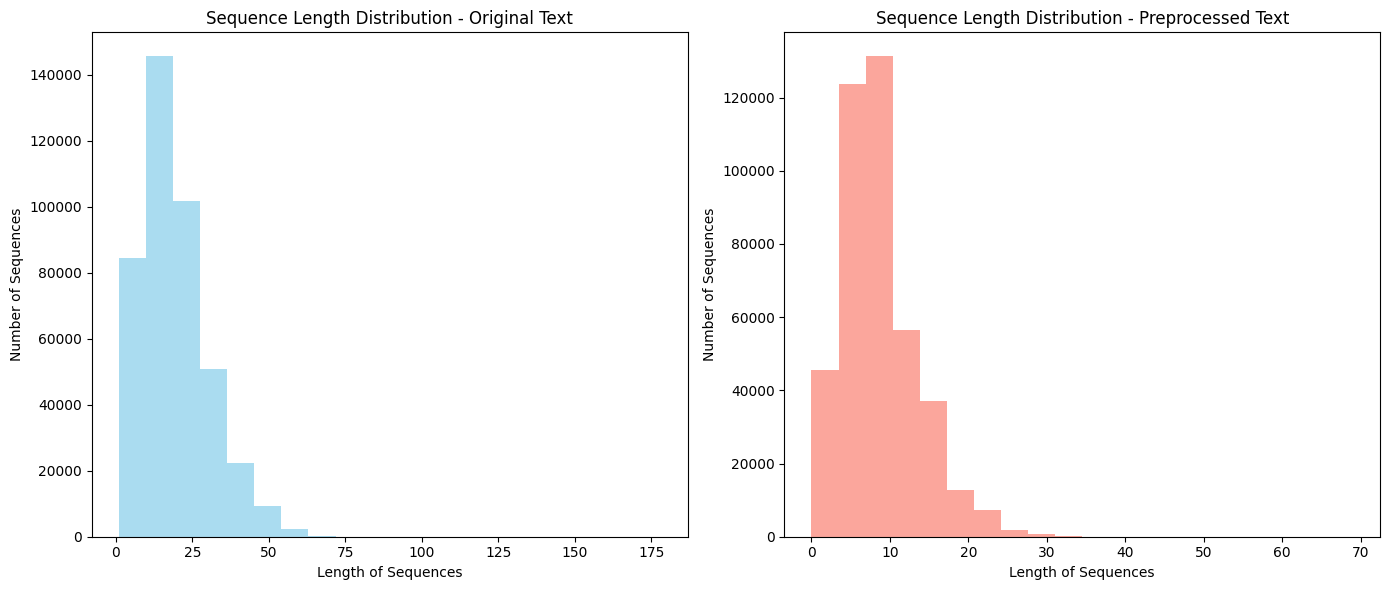

In [12]:
# Set up a figure with a size of 14x6 inches for two side-by-side plots
plt.figure(figsize=(14, 6))

# Plot histogram for sequence lengths in the original text column
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.hist(
    [len(sent.split()) for sent in df['text']],  # Lengths of sequences in original text
    bins=20,  # Number of bins in the histogram
    color='skyblue',  # Bar color
    alpha=0.7  # Transparency
)
plt.title('Sequence Length Distribution - Original Text')  # Title of the plot
plt.xlabel('Length of Sequences')  # X-axis label
plt.ylabel('Number of Sequences')  # Y-axis label

# Plot histogram for sequence lengths in the preprocessed text column
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.hist(
    [len(sent.split()) for sent in df['preprocessed_text']],  # Lengths of sequences in preprocessed text
    bins=20,
    color='salmon',
    alpha=0.7
)
plt.title('Sequence Length Distribution - Preprocessed Text')
plt.xlabel('Length of Sequences')
plt.ylabel('Number of Sequences')

# Adjust layout so plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()

## 2. Generate Word Cloud for Each Class



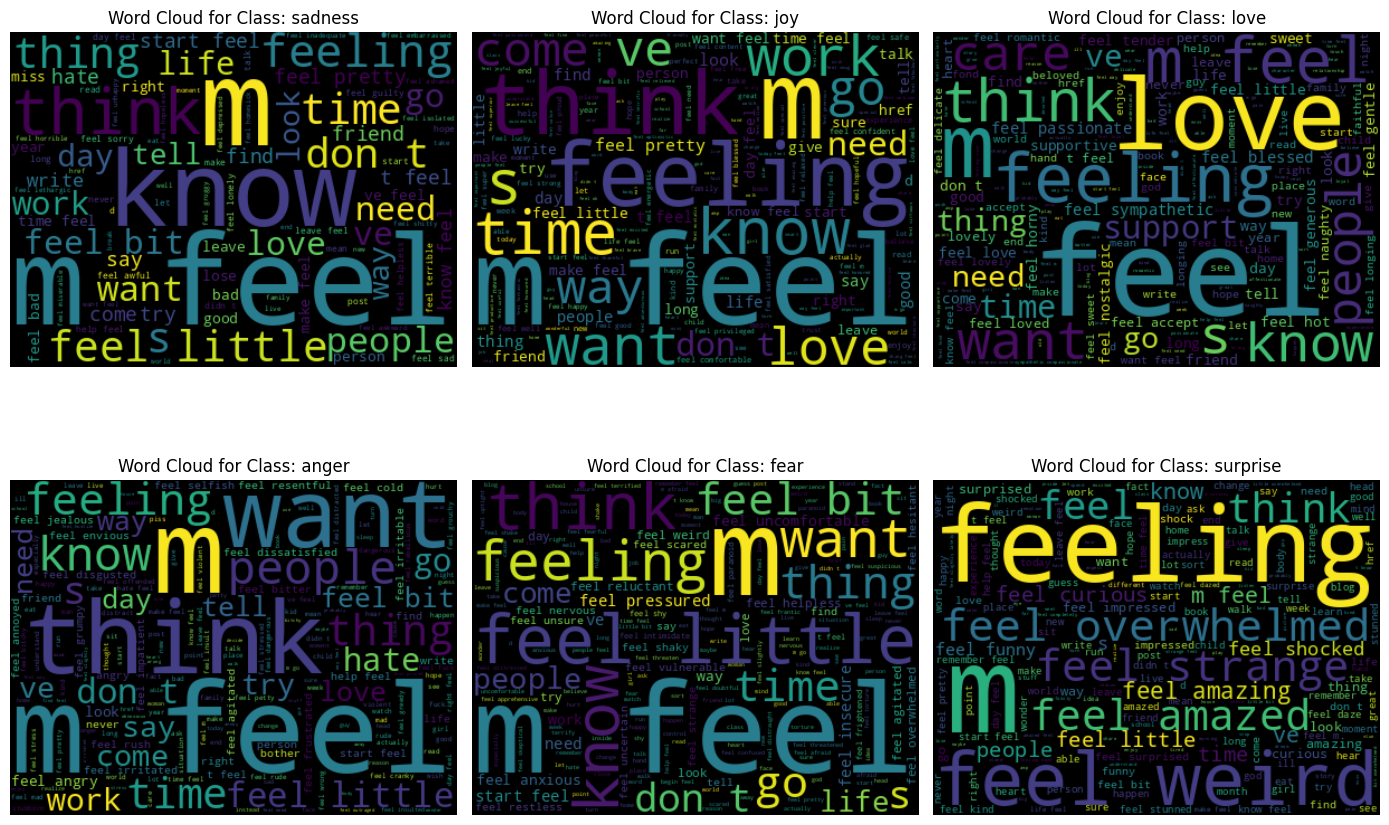

In [13]:
# List of emotion class names corresponding to label indices
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Set up a figure with size 14x10 inches for multiple subplots
plt.figure(figsize=(14, 10))

# Loop through each class index and its corresponding name
for i, class_name in enumerate(class_names):
    # Create a subplot in a 2-row by 3-column grid, position i+1
    plt.subplot(2, 3, i + 1)

    # Concatenate all preprocessed text entries that belong to the current class into one string
    text_class = ' '.join(df[df['label'] == i]['preprocessed_text'])

    # Generate a word cloud from the combined text of the class
    wordcloud = WordCloud(
        width=400, height=300, random_state=21, max_font_size=110
    ).generate(text_class)

    # Display the generated word cloud image with smooth interpolation
    plt.imshow(wordcloud, interpolation="bilinear")

    # Set the title of the subplot to the class name
    plt.title(f'Word Cloud for Class: {class_name}')

    # Hide the axis for a cleaner visualization
    plt.axis('off')

# Adjust subplot layout to prevent overlapping elements
plt.tight_layout()

# Display all the word cloud plots
plt.show()

## 3. Bar and Pie Chart for Visualizing the Number of Samples for Each Class



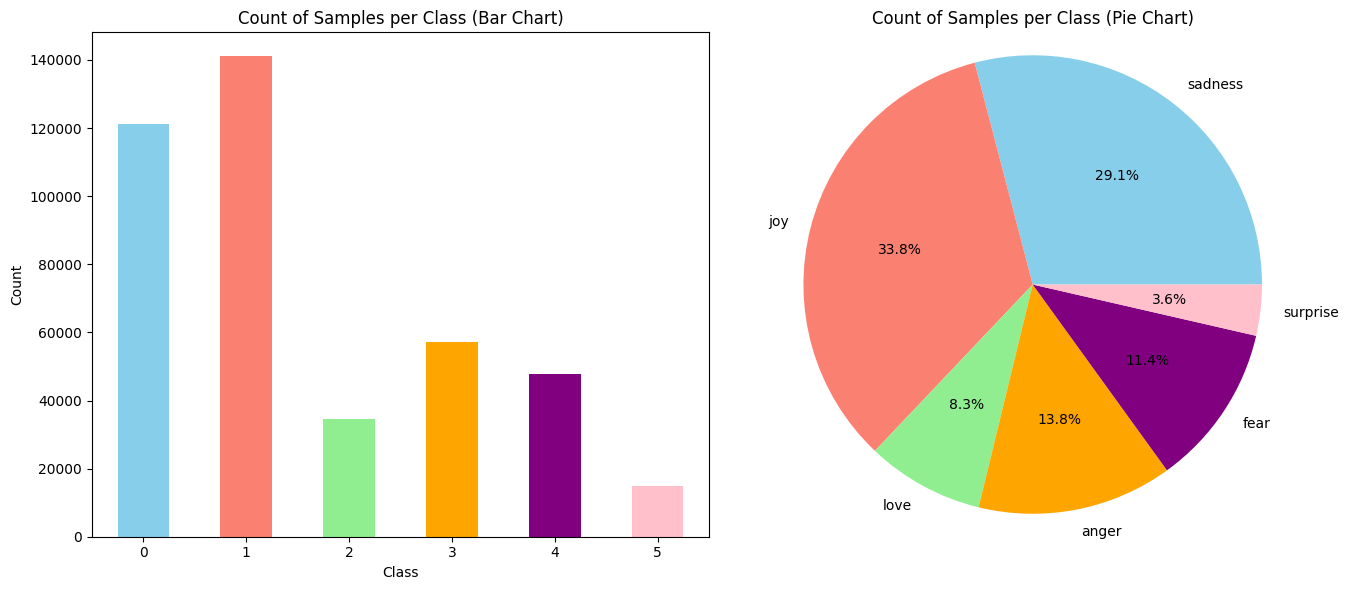

In [14]:
# Set up a figure with size 14x6 inches for side-by-side bar and pie charts
plt.figure(figsize=(14, 6))

# Bar chart subplot (1 row, 2 columns, 1st plot)
plt.subplot(1, 2, 1)
# Plot the count of samples per class as a bar chart
# Sorting by index to keep classes in order
df['label'].value_counts().sort_index().plot(
    kind='bar',
    color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'pink']  # Colors per class
)
plt.title('Count of Samples per Class (Bar Chart)')  # Title
plt.xlabel('Class')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability

# Pie chart subplot (1 row, 2 columns, 2nd plot)
plt.subplot(1, 2, 2)
# Plot the same class counts as a pie chart with labels and percentage annotations
plt.pie(
    df['label'].value_counts().sort_index(),
    labels=class_names,  # Use class names as labels
    autopct='%1.1f%%',   # Display percentages with 1 decimal place
    colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'pink']  # Same color scheme
)
plt.title('Count of Samples per Class (Pie Chart)')  # Title
plt.axis('equal')  # Equal aspect ratio to make pie circular

# Adjust layout to avoid overlap between plots
plt.tight_layout()

# Display the plots
plt.show()

# Split Data to Train and Test



In [15]:
# One-hot encode the label column into categorical format with 6 classes
labels = to_categorical(df['label'], num_classes=6)

# Split the dataset into training and testing sets
# - 80% for training and 20% for testing
# - random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    df['preprocessed_text'],  # Features (preprocessed text)
    labels,                   # One-hot encoded labels
    test_size=0.1,
    random_state=42
)

# Initialize a tokenizer with a maximum vocabulary size (from previous calculation)
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)

# Fit tokenizer only on the training texts to avoid data leakage
tokenizer.fit_on_texts(X_train)

# Convert training texts to sequences of integer word indices
X_train = tokenizer.texts_to_sequences(X_train)

# Convert testing texts to sequences of integer word indices using the same tokenizer
X_test = tokenizer.texts_to_sequences(X_test)

# Pad all sequences to the maximum sequence length to ensure consistent input shape
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

In [16]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(375128, 69) (375128, 6)
(41681, 69) (41681, 6)


# Implement Transformer Encoder Class



In [17]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons, **kwargs):
        """
        Custom Transformer Encoder layer.

        Args:
        - embed_dim: Dimension of the embedding vector (also key_dim for attention).
        - heads: Number of attention heads.
        - neurons: Number of neurons in the feed-forward network's hidden layer.
        - **kwargs: Additional keyword arguments for the parent class.
        """
        super().__init__(**kwargs)

        # Multi-head self-attention layer
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)

        # Feed-forward network with two dense layers:
        # first with 'neurons' units and ReLU activation,
        # second projects back to embed_dim
        self.ffn = tf.keras.Sequential([
            layers.Dense(neurons, activation="relu"),
            layers.Dense(embed_dim),
        ])

        # Layer normalization layers applied after residual connections
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)

        # Dropout layers for regularization during training
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training=False):
        """
        Forward pass of the Transformer Encoder.

        Args:
        - inputs: Input tensor of shape (batch_size, sequence_length, embed_dim)
        - training: Boolean indicating whether in training mode (for dropout)

        Returns:
        - Output tensor of the same shape as inputs
        """
        # Apply multi-head self-attention: query, key, value all are 'inputs'
        attn_output = self.att(inputs, inputs)

        # Apply dropout to attention output during training
        attn_output = self.dropout1(attn_output, training=training)

        # Add & normalize: residual connection + layer normalization
        out1 = self.layernorm1(inputs + attn_output)

        # Pass through the feed-forward network
        ffn_output = self.ffn(out1)

        # Apply dropout to feed-forward output during training
        ffn_output = self.dropout2(ffn_output, training=training)

        # Add & normalize: residual connection + layer normalization
        return self.layernorm2(out1 + ffn_output)

# Implement TokenAndPositionEmbedding Class



In [18]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim, **kwargs):
        """
        Custom layer to combine token embeddings with positional embeddings.

        Args:
        - maxlen: Maximum length of input sequences (sequence length).
        - vocab_size: Size of the vocabulary (number of unique tokens).
        - embed_dim: Dimension of the embedding vectors.
        - **kwargs: Additional keyword arguments for the parent class.
        """
        super().__init__(**kwargs)

        # Token embedding layer: maps token indices to embedding vectors
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)

        # Positional embedding layer: learns a positional embedding vector for each position in the sequence
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        """
        Forward pass to add token embeddings and positional embeddings.

        Args:
        - x: Input tensor of token indices with shape (batch_size, sequence_length)

        Returns:
        - Tensor of shape (batch_size, sequence_length, embed_dim) with combined embeddings
        """
        # Determine the sequence length dynamically from the input shape
        maxlen = tf.shape(x)[-1]

        # Create a range tensor [0, 1, 2, ..., maxlen-1] representing token positions
        positions = tf.range(start=0, limit=maxlen, delta=1)

        # Get the positional embeddings for each position in the sequence
        positions = self.pos_emb(positions)

        # Get the token embeddings for the input tokens
        x = self.token_emb(x)

        # Add token embeddings and positional embeddings element-wise
        return x + positions

# Build the Model



In [ ]:
# Set hyperparameters for the Transformer model
embed_dim = 100  # Dimension of the token embeddings and attention key vectors
heads = 8       # Number of attention heads in the multi-head attention layer
neurons = 64     # Number of neurons in the feed-forward network hidden layer

# Define the input layer with a fixed sequence length `maxlen`
inputs = layers.Input(shape=(maxlen,))

# Create token and positional embeddings for the input tokens
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)  # Output shape: (batch_size, maxlen, embed_dim)

# Pass the embeddings through a Transformer encoder block
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x, training=True)  # Ensure training=True to activate dropout

# Apply global average pooling to reduce sequence dimension, resulting in (batch_size, embed_dim)
x = layers.GlobalAveragePooling1D()(x)

# Add dropout for regularization (35% dropout rate)
x = layers.Dropout(0.35)(x)

# Final dense layer with softmax activation for multi-class classification (6 classes)
outputs = layers.Dense(6, activation="softmax")(x)

# Create the Keras model instance
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 69)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding    │ (None, 69, 100)        │     6,249,700 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ (None, 69, 100)        │       335,864 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 100)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,586,170 (25.12 MB)

 Trainable params: 6,586,170 (25.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# Train the Model



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1024, validation_split=0.15, verbose=1,callbacks=[early_stop])

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3829s 12s/step - accuracy: 0.4053 - loss: 1.4380 - val_accuracy: 0.9003 - val_loss: 0.2168
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3853s 12s/step - accuracy: 0.9036 - loss: 0.2103 - val_accuracy: 0.9025 - val_loss: 0.2052
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3845s 12s/step - accuracy: 0.9099 - loss: 0.1887 - val_accuracy: 0.8976 - val_loss: 0.2064
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3835s 12s/step - accuracy: 0.9141 - loss: 0.1734 - val_accuracy: 0.8941 - val_loss: 0.2191
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3809s 12s/step - accuracy: 0.9189 - loss: 0.1621 - val_accuracy: 0.8916 - val_loss: 0.2328


# Plot Training History

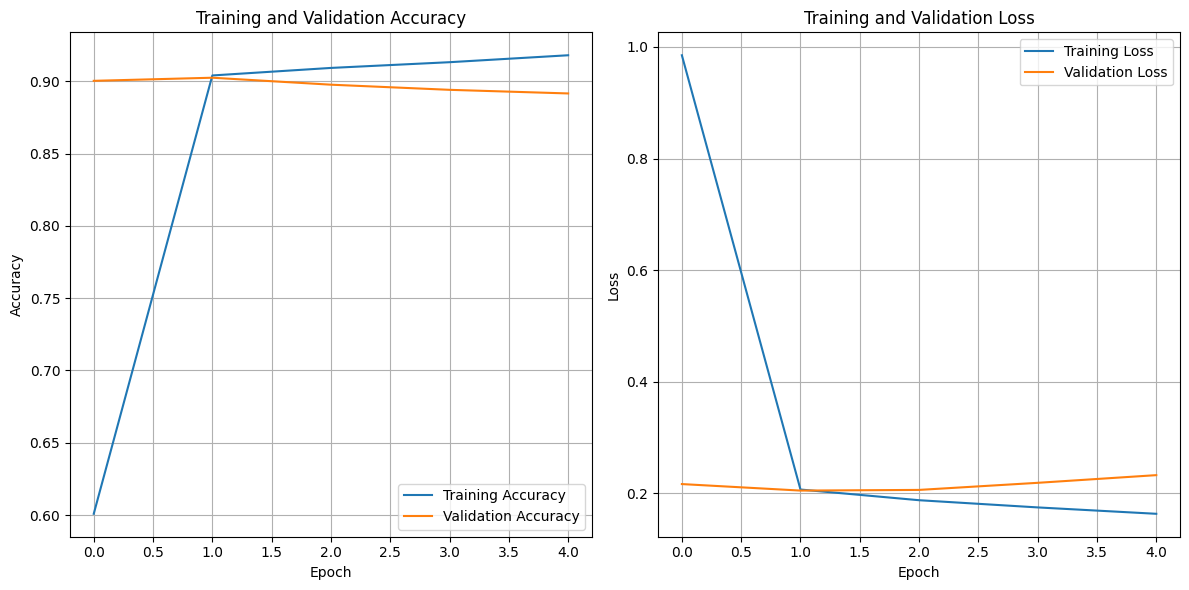

In [ ]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_history(history)

# Evaluate the Model



In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1303/1303 ━━━━━━━━━━━━━━━━━━━━ 115s 88ms/step - accuracy: 0.9060 - loss: 0.1945
Test Loss: 0.2006
Test Accuracy: 0.9036


In [ ]:
# Evaluate the model and get predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names ))

1303/1303 ━━━━━━━━━━━━━━━━━━━━ 119s 91ms/step

Classification Report:

              precision    recall  f1-score   support

     sadness       0.94      0.94      0.94     12012
         joy       0.90      0.95      0.93     14142
        love       0.89      0.70      0.78      3495
       anger       0.90      0.92      0.91      5667
        fear       0.88      0.85      0.86      4849
    surprise       0.76      0.78      0.77      1516

    accuracy                           0.90     41681
   macro avg       0.88      0.85      0.86     41681
weighted avg       0.90      0.90      0.90     41681



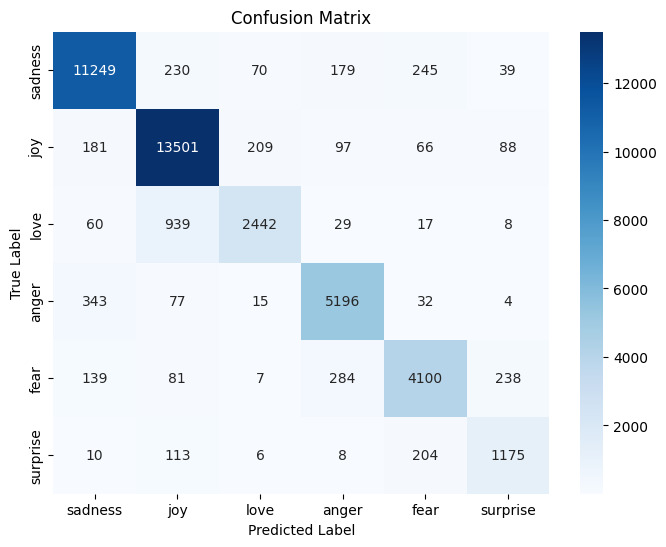

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Test Model by Some User Text Examples



In [ ]:
# Function to predict the emotion class for a custom input sentence using the trained model
def predict_custom_sentence(sentence):
    # Step 1: Preprocess the input sentence (cleaning, lemmatization, removing stopwords, etc.)
    preprocessed_sentence = preprocess_text(sentence)

    # Step 2: Convert the preprocessed sentence to a sequence of token indices using the tokenizer
    sequence = tokenizer.texts_to_sequences([preprocessed_sentence])

    # Step 3: Pad the sequence to the maximum sequence length used during training
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    # Step 4: Use the trained model to predict probabilities for each emotion class
    prediction = model.predict(padded_sequence)

    # Step 5: Extract the index of the class with the highest predicted probability
    predicted_index = tf.argmax(prediction, axis=1).numpy()[0]

    # Step 6: Map the predicted index to the corresponding emotion class name
    predicted_class = class_names[predicted_index]

    # Return the predicted emotion class as a string
    return predicted_class

In [ ]:
# Test the model with a custom sentence
custom_sentence = "I am very happy with the current situation"
predicted_class = predict_custom_sentence(custom_sentence)
print(f"\nCustom Sentence: '{custom_sentence}'\nPredicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Custom Sentence: 'I am very happy with the current situation'
Predicted Class: joy


In [ ]:
custom_sentence = "si would think that whomever would be lucky enough to stay in this suite must feel like it is the most romantic place on earth"
predicted_class = predict_custom_sentence(custom_sentence)
print(f"\nCustom Sentence: '{custom_sentence}'\nPredicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Custom Sentence: 'si would think that whomever would be lucky enough to stay in this suite must feel like it is the most romantic place on earth'
Predicted Class: joy


In [ ]:
custom_sentence = "i think that after i had spent some time investigating the surroundings and things i started to feel more curious about other people"
predicted_class = predict_custom_sentence(custom_sentence)
print(f"\nCustom Sentence: '{custom_sentence}'\nPredicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Custom Sentence: 'i think that after i had spent some time investigating the surroundings and things i started to feel more curious about other people'
Predicted Class: surprise


In [ ]:
custom_sentence = "i am not bored i feel relaxed on the verge of possible sleep"
predicted_class = predict_custom_sentence(custom_sentence)
print(f"\nCustom Sentence: '{custom_sentence}'\nPredicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Custom Sentence: 'i am not bored i feel relaxed on the verge of possible sleep'
Predicted Class: joy


In [ ]:
custom_sentence = "si walked away feeling oddly dissatisfied"
predicted_class = predict_custom_sentence(custom_sentence)
print(f"\nCustom Sentence: '{custom_sentence}'\nPredicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Custom Sentence: 'si walked away feeling oddly dissatisfied'
Predicted Class: anger


In [ ]:
custom_sentence = "i feel very much content with what my kids know and learned so far at this time"
predicted_class = predict_custom_sentence(custom_sentence)
print(f"\nCustom Sentence: '{custom_sentence}'\nPredicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Custom Sentence: 'i feel very much content with what my kids know and learned so far at this time'
Predicted Class: joy


# Save Model



In [ ]:
model.save("Trained_Model.h5")  # Saves in HDF5 format

# Then download it
files.download("Trained_Model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load Model



In [28]:
from tensorflow.keras.models import load_model

#tokenizer = tf.keras.preprocessing.text.Tokenizer()

loaded_model = load_model(
    "Trained_Model.h5",
    custom_objects={
        "TokenAndPositionEmbedding": TokenAndPositionEmbedding,
        "TransformerEncoder": TransformerEncoder
    }
)

# Deploy Model Using Gradio Package



In [20]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.3 MB/s eta 0:00:00


In [29]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Emoji map for each emotion class
emoji_map = {
    "sadness": "😢",
    "joy": "😊",
    "love": "❤️",
    "anger": "😠",
    "fear": "😨",
    "surprise": "😲"
}
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Function to return class probabilities and final prediction
def predict_with_details(sentence):
    # Preprocess and tokenize input sentence
    preprocessed_sentence = preprocess_text(sentence)
    sequence = tokenizer.texts_to_sequences([preprocessed_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    # Predict with loaded model
    prediction = loaded_model.predict(padded_sequence)[0]

    # Normalize prediction so total = 100%
    total_prob = np.sum(prediction)
    prediction = prediction / total_prob  # Ensure sum = 1.0 (100%)

    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    emoji_icon = emoji_map.get(predicted_class, "")
    confidence = prediction[predicted_index]

    # Format confidence for each class
    detailed_probs = "### 📊 Emotion Class Probabilities:\n"
    for i, class_name in enumerate(class_names):
        detailed_probs += f"- {emoji_map[class_name]} **{class_name.capitalize()}**: {prediction[i] * 100:.2f}%\n"

    # Final predicted class
    final_result = (
        f"{detailed_probs}\n"
        f"---\n"
        f"### ✅ Final Prediction: {emoji_icon} **{predicted_class.capitalize()}**\n"
        f"Confidence: **{confidence * 100:.2f}%**"
    )

    return final_result

# Gradio UI using Blocks
with gr.Blocks(title="Emotion Classifier") as iface:
    gr.Markdown("## 🧠 Emotion Classification from Text")
    gr.Markdown("Type a sentence below and the model will predict the **emotion it conveys**, along with the probabilities for all emotion classes.")

    with gr.Row():
        with gr.Column(scale=3):
            input_text = gr.Textbox(
                label="Input Sentence",
                placeholder="e.g., I feel happy and excited today!",
                lines=4
            )
            submit_button = gr.Button("🔍 Predict Emotion")

        with gr.Column(scale=2):
            output_text = gr.Markdown(label="Prediction Output")

    submit_button.click(
        fn=predict_with_details,
        inputs=input_text,
        outputs=output_text
    )

# Launch app
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0755e8e569487399d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Examples

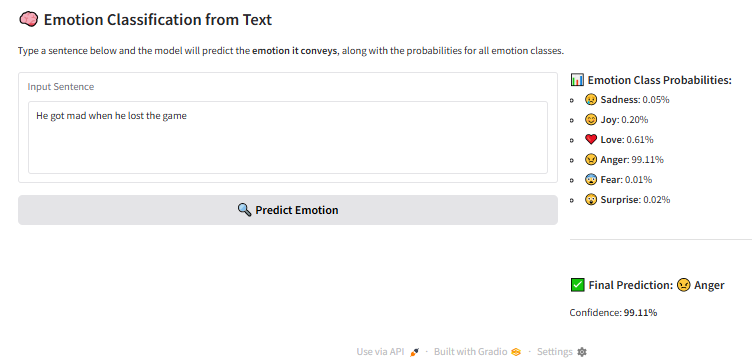

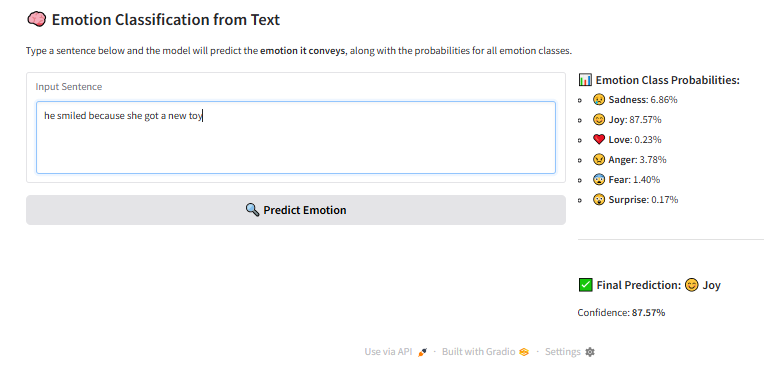

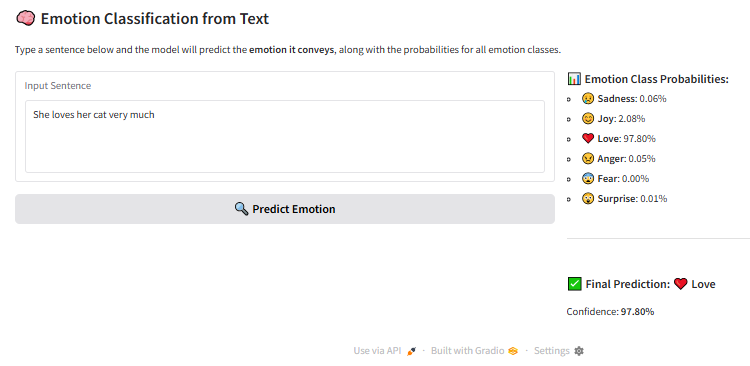

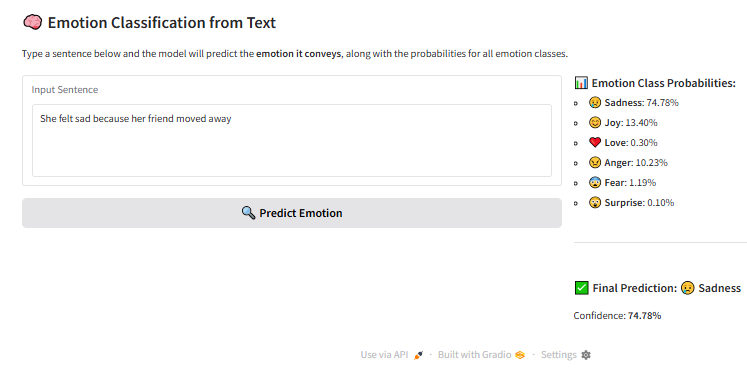